## Multiple Linear Regression

In [1]:
from sklearn.datasets import fetch_california_housing

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
california=fetch_california_housing()

In [4]:
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [5]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [6]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [8]:
california.target_names
# Output feature

['MedHouseVal']

In [9]:
print(california.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [10]:
print(california.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [14]:
california.data.shape

(20640, 8)

In [15]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [16]:
## Lets prepare the dataframe 
dataset=pd.DataFrame(california.data,columns=california.feature_names)
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [17]:
dataset['Price']=california.target

In [18]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [20]:
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [21]:
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [22]:
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

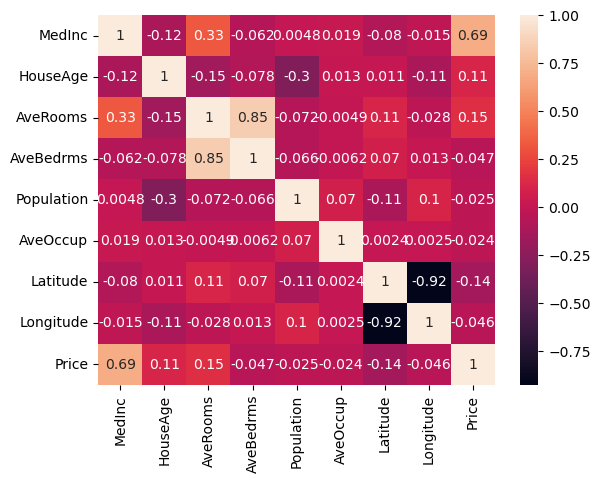

In [23]:
import seaborn as sns
sns.heatmap(dataset.corr(),annot=True)

In [24]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [25]:
## Independent and Dependent features
X=dataset.iloc[:,:-1] #independent features
y=dataset.iloc[:,-1] #dependent features

In [26]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=15)

In [28]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((14448, 8), (14448,), (6192, 8), (6192,))

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [30]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [31]:
X_train

array([[ 1.1883355 , -0.84749474,  1.04244114, ..., -0.05841939,
        -0.6599063 ,  0.45806111],
       [-0.32735698, -1.00638351, -0.31730006, ..., -0.12221186,
         1.3650939 , -0.91231448],
       [-0.10051543, -1.32416104, -0.2494164 , ..., -0.03815898,
         1.22978283, -1.22625507],
       ...,
       [-0.14722892,  0.10583787, -0.51506003, ..., -0.09947696,
        -0.84654226,  0.69227076],
       [ 0.45505456,  0.34417102,  0.52081632, ..., -0.01740507,
        -0.6365768 ,  0.17900281],
       [ 0.87999494, -0.37082844,  0.53601362, ...,  0.02600149,
        -0.83721046,  0.65738847]])

In [32]:
X_test

array([[-0.47212151,  1.85361431, -0.46436934, ..., -0.04901455,
         0.99182198, -1.34585149],
       [-1.02495911,  0.58250417,  0.79365646, ...,  0.0080902 ,
         0.98249018, -1.30100283],
       [-0.00414587, -1.48304981,  0.01333619, ...,  0.00424011,
        -0.51992932,  0.80688399],
       ...,
       [-0.66591155,  0.90028171, -0.62048311, ...,  0.08416207,
        -0.75789018,  0.71718668],
       [ 0.23903751, -1.08582789,  0.35381677, ...,  0.01983588,
        -0.80921507,  1.07099274],
       [-1.53623273,  1.85361431, -1.08623099, ...,  0.08630962,
         1.30443721, -1.56511158]])

## Model Training

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
regression=LinearRegression()

In [35]:
regression

LinearRegression()

In [36]:
regression.fit(X_train,y_train)

LinearRegression()

In [37]:
## slope or coefficients
regression.coef_

array([ 0.82482311,  0.12318918, -0.26539118,  0.30574122, -0.00374742,
       -0.04005428, -0.89128193, -0.85141321])

In [38]:
## intercepts
regression.intercept_

2.063679443521596

In [39]:
## Prediction for the test data
y_pred=regression.predict(X_test)

In [40]:
y_test

540      2.208
343      0.828
9103     1.410
1277     3.409
2726     0.561
         ...  
1626     4.043
8972     3.335
7231     1.806
11960    1.380
19266    1.292
Name: Price, Length: 6192, dtype: float64

In [41]:
y_pred

array([2.25988708, 1.70549284, 1.62165047, ..., 1.79238927, 1.83246329,
       1.3411755 ])

In [42]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.527479759100387
0.532723117791064
0.726278017773075


In [43]:
## R square and adjusted R square

from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.6074594614455731


In [44]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6069515649053119

In order to understand whether our prediction was good or not, there are some assumptions 
## Assumptions

Text(0, 0.5, 'Test Predicted Data')

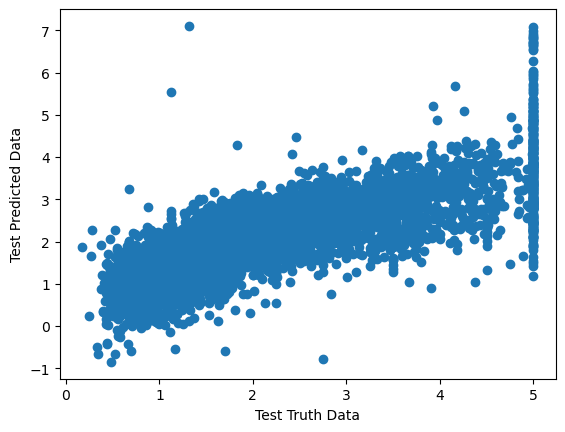

In [45]:
plt.scatter(y_test,y_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [46]:
residuals=y_test-y_pred

In [47]:
residuals

540     -0.051887
343     -0.877493
9103    -0.211650
1277     0.538581
2726    -0.141102
           ...   
1626     0.073546
8972     0.636351
7231     0.013611
11960   -0.452463
19266   -0.049176
Name: Price, Length: 6192, dtype: float64

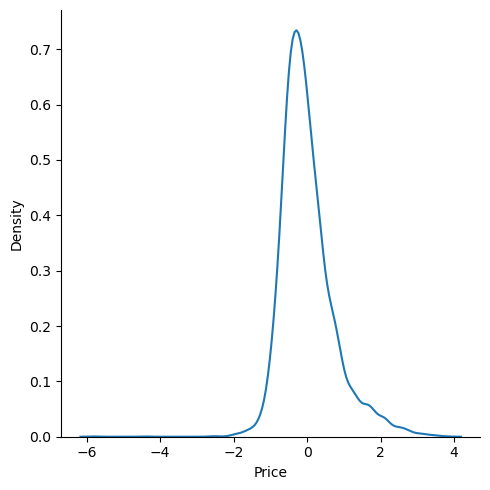

In [48]:
sns.displot(residuals,kind="kde")

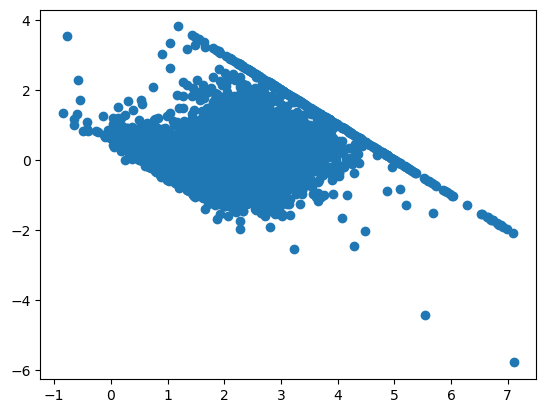

In [49]:
## SCatter plot with predictions and residual
##uniform distribution
plt.scatter(y_pred,residuals)

In [50]:
regression

LinearRegression()

## Pickling 
Python pickle module is used for serialising and de-serialising a Python object structure. Any object in Python can be pickled so that it can be saved on disk. What pickle does is that it “serialises” the object first before writing it to file. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.

In [51]:
import pickle
pickle.dump(regression,open('regressor.pkl','wb'))

In [52]:
model=pickle.load(open('regressor.pkl','rb'))

In [53]:
model.predict(X_test)

array([2.25988708, 1.70549284, 1.62165047, ..., 1.79238927, 1.83246329,
       1.3411755 ])